In [1]:
import pandas as pd
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import calendar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.signal import periodogram
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
pip install -U seaborn

Requirement already up-to-date: seaborn in /Users/school/opt/anaconda3/lib/python3.8/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('/Users/school/BC_data_second_full_week.csv', sep= "\t" , error_bad_lines=False, index_col=False, dtype='unicode')
#https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
## you have more commas, take a look at line 40
df = df.iloc[1: , :]

/Users/school/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
df[:10]


,amt_paid_usd,country_code,item_description,currency,art_url,item_slug,utc_date,artist_name,item_type,album_title,country,addl_count,amount_paid_fmt,item_price,amount_paid,url,system_time,premium,premium_percent
1,10.00,us,Passing in the Night,USD,https://f4.bcbits.com/img/a3334042720_7.jpg,-1,1.633378e+09,Thunder and Rain,a,-1,United States,-1,$10,10.00,10.0,//thunderandrain.bandcamp.com/album/passing-in...,1633378201.23336,0.00,0.000000
2,25.00,us,WORM - FOREVERGLADE LP - B3 BANDCAMP EXCLUSIVE...,USD,https://f4.bcbits.com/img/0026246538_37.jpg,-1,1.633378e+09,Worm,p,Foreverglade,United States,-1,$25,24.99,25.0,https://listen.20buckspin.com/album/foreverglade,1633378201.23366,0.01,0.000400
3,6.80,ca,Enthusiasm,GBP,https://f4.bcbits.com/img/a4196994013_7.jpg,-1,1.633378e+09,Patrick Ward,a,-1,Canada,-1,£5,0.00,5.0,//patrickward.bandcamp.com/album/enthusiasm,1633378201.23385,5.00,500.000000
4,2.04,gb,Concealed,GBP,https://f4.bcbits.com/img/a3898929467_7.jpg,-1,1.633378e+09,Surface ft Ackroyd,t,The Water Copy EP,United Kingdom,-1,£1.50,1.50,1.5,https://losslessmusic.co.uk/track/concealed,1633378201.23403,0.00,0.000000
5,1.16,us,Surveillance,EUR,https://f4.bcbits.com/img/a3469297237_7.jpg,-1,1.633378e+09,Dynatron,t,-1,United States,-1,€1,0.00,1.0,https://music.dynatronsynth.com/track/surveill...,1633378201.23421,1.00,100.000000
6,1.16,gb,Suflet Impacat [DNSR006](free download),EUR,https://f4.bcbits.com/img/a3197345297_7.jpg,-1,1.633378e+09,Cojoc & Moldovan,t,-1,United Kingdom,-1,€1,0.00,1.0,//moldovansound.bandcamp.com/track/suflet-impa...,1633378201.23438,1.00,100.000000
7,20.00,us,On Myself Black Tee - ONLY 50 Made!,USD,https://f4.bcbits.com/img/0026288301_37.jpg,-1,1.633378e+09,Sheridan,p,-1,United States,-1,$20,20.00,20.0,//sheridancartercrane.bandcamp.com/merch/on-my...,1633378201.23456,0.00,0.000000
8,1.00,ru,Temple of Odin,USD,https://f4.bcbits.com/img/a2006209540_7.jpg,-1,1.633378e+09,Danheim,t,Munarvagr,Russian Federation,-1,$1,1.00,1.0,//danheim.bandcamp.com/track/temple-of-odin-2,1633378201.23473,0.00,0.000000
9,1.36,de,Microdosing,GBP,https://f4.bcbits.com/img/a3503748943_7.jpg,-1,1.633378e+09,UNiiQU3,t,Heartbeats,Germany,-1,£1,1.00,1.0,//uniiqu3.bandcamp.com/track/microdosing-2,1633378201.2349,0.00,0.000000
10,2.32,ie,Two Moon Junction,EUR,https://f4.bcbits.com/img/a1268027059_7.jpg,-1,1.633378e+09,Sunken Foal,t,Two Moon Junction,Ireland,-1,€2,1.00,2.0,//countersunk.bandcamp.com/track/two-moon-junc...,1633378201.23507,1.00,0.990099


In [4]:
# converting some columns to float
df["amt_paid_usd"] = pd.to_numeric(df["amt_paid_usd"], downcast="float")
df["amount_paid"] = pd.to_numeric(df["amount_paid"], downcast="float")
df["item_price"] = pd.to_numeric(df["item_price"], downcast="float")
df["utc_date"] = pd.to_numeric(df["utc_date"], downcast="integer")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863998 entries, 1 to 863998
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   amt_paid_usd      863998 non-null  float32
 1   country_code      863998 non-null  object 
 2   item_description  863998 non-null  object 
 3   currency          863998 non-null  object 
 4   art_url           863998 non-null  object 
 5   item_slug         863998 non-null  object 
 6   utc_date          863998 non-null  float64
 7   artist_name       863997 non-null  object 
 8   item_type         863998 non-null  object 
 9   album_title       863996 non-null  object 
 10  country           863998 non-null  object 
 11  addl_count        863998 non-null  object 
 12  amount_paid_fmt   863998 non-null  object 
 13  item_price        863998 non-null  float32
 14  amount_paid       863998 non-null  float32
 15  url               863998 non-null  object 
 16  system_time       86

In [5]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df = df[df['amt_paid_usd'] >= 0.00].copy()

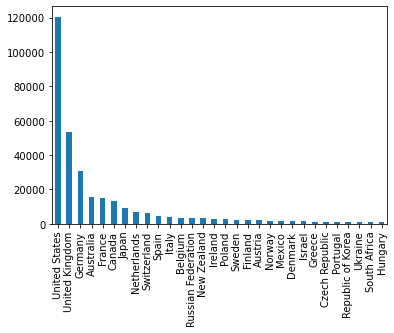

In [6]:
df.country.value_counts()[:30].plot(kind = "bar")
country_sales = pd.DataFrame(df.groupby('country').sum()['amt_paid_usd'])
sales_by_country = pd.DataFrame(country_sales.sort_values('amt_paid_usd', ascending =False)[:15])

In [7]:
sales_by_country
sales_by_country = sales_by_country.reset_index()

In [8]:
sales_by_country

,country,amt_paid_usd
0,United States,1.216319e+06
1,United Kingdom,4.522754e+05
2,Germany,2.174547e+05
3,Australia,1.439495e+05
4,France,1.208310e+05
5,Canada,1.188685e+05
6,Japan,5.909184e+04
7,Switzerland,4.745019e+04
8,Netherlands,4.472918e+04
9,Italy,3.700922e+04


We are interested in the top 15 countries ranked by sales over the period of data collection

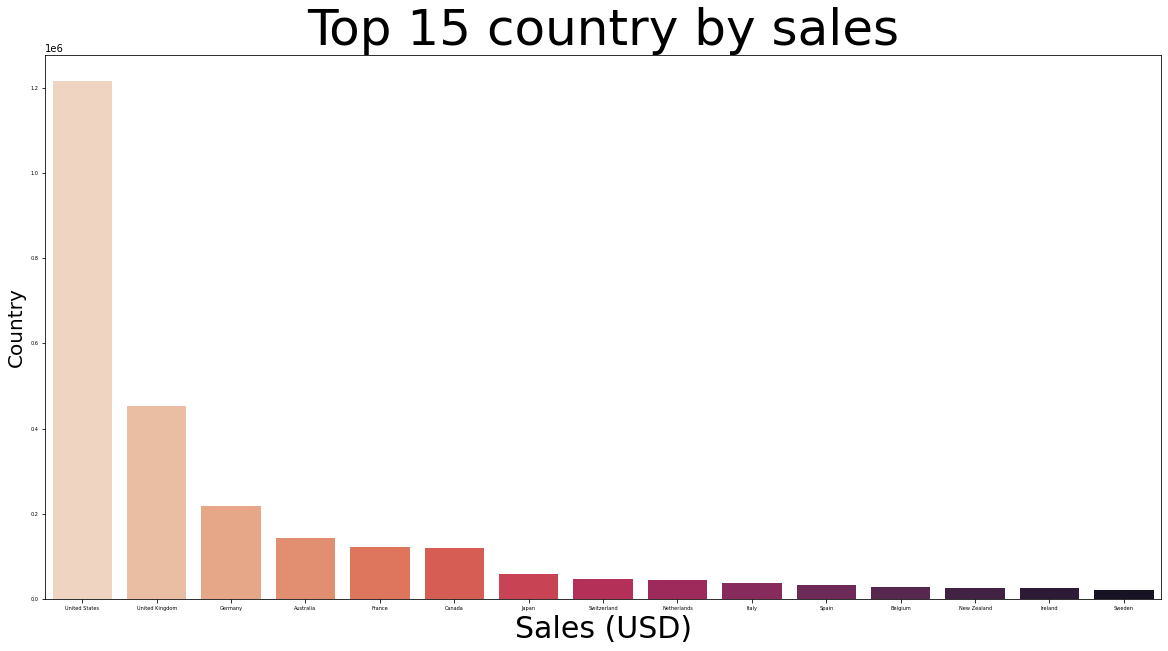

In [9]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,10)
plt.title("Top 15 country by sales")
ax = sns.barplot(x ='country',y= 'amt_paid_usd',data=sales_by_country, palette=("rocket_r"))
ax.axes.set_title("Top 15 country by sales", fontsize =50)
ax.set_xlabel("Sales (USD)",fontsize=30)
ax.set_ylabel("Country",fontsize=20)
ax.tick_params(labelsize=5)

#plt.figure(figsize=(20,45))



In [10]:
## adding a new column called premium and premium percent. Note amount paid and item price are both in local currency,
## not USD

df['premium'] = df['amount_paid'] - df['item_price']
df['premium_percent'] = df['premium']/(df['item_price']+0.01)

# some of the item price is actually listed as free, so dividing by 0 gives an error
df.shape

# For visualization purposes and removing outlier, we remove transactions with huge premium
df = df[(df['premium'] >= 0.00) & (df['premium'] <= 200)].copy()

# we filter df by the 5 countries of interest
df_big6 = df[(df['country'] == "United States") | 
             (df['country'] == "United Kingdom") |
             (df['country'] == "Germany") |
             (df['country'] == "Australia") |
             (df['country'] == "Canada") |
             (df['country'] == "Japan")].copy()

In [19]:
df_big6

,amt_paid_usd,country_code,item_description,currency,art_url,item_slug,utc_date,artist_name,item_type,album_title,country,addl_count,amount_paid_fmt,item_price,amount_paid,url,system_time,premium,premium_percent
1,10.00,us,Passing in the Night,USD,https://f4.bcbits.com/img/a3334042720_7.jpg,-1,1.633378e+09,Thunder and Rain,a,-1,United States,-1,$10,10.00,10.00,//thunderandrain.bandcamp.com/album/passing-in...,1633378201.23336,0.00,0.0000
2,25.00,us,WORM - FOREVERGLADE LP - B3 BANDCAMP EXCLUSIVE...,USD,https://f4.bcbits.com/img/0026246538_37.jpg,-1,1.633378e+09,Worm,p,Foreverglade,United States,-1,$25,24.99,25.00,https://listen.20buckspin.com/album/foreverglade,1633378201.23366,0.01,0.0004
3,6.80,ca,Enthusiasm,GBP,https://f4.bcbits.com/img/a4196994013_7.jpg,-1,1.633378e+09,Patrick Ward,a,-1,Canada,-1,£5,0.00,5.00,//patrickward.bandcamp.com/album/enthusiasm,1633378201.23385,5.00,500.0000
4,2.04,gb,Concealed,GBP,https://f4.bcbits.com/img/a3898929467_7.jpg,-1,1.633378e+09,Surface ft Ackroyd,t,The Water Copy EP,United Kingdom,-1,£1.50,1.50,1.50,https://losslessmusic.co.uk/track/concealed,1633378201.23403,0.00,0.0000
5,1.16,us,Surveillance,EUR,https://f4.bcbits.com/img/a3469297237_7.jpg,-1,1.633378e+09,Dynatron,t,-1,United States,-1,€1,0.00,1.00,https://music.dynatronsynth.com/track/surveill...,1633378201.23421,1.00,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692982,1.74,us,Mori Shej ft. Peia,EUR,https://f4.bcbits.com/img/a2753422987_7.jpg,-1,1.634327e+09,Satori,t,Mori Shej,United States,-1,€1.50,1.50,1.50,//satorimaktub.bandcamp.com/track/mori-shej-ft...,1634327406.81278,0.00,0.0000
692983,1.16,gb,RAPULOK - I LOVE YOU (LIVE REEMAKE by REELOW),EUR,https://f4.bcbits.com/img/a2773423982_7.jpg,-1,1.634327e+09,Reelow,t,-1,United Kingdom,-1,€1,0.00,1.00,//reelow.bandcamp.com/track/rapulok-i-love-you...,1634327407.07717,1.00,100.0000
692986,4.14,gb,Swamplyfe (Intro),GBP,https://f4.bcbits.com/img/a3431501235_7.jpg,/album/,1.634327e+09,peachlyfe,t,Swamplyfe,United Kingdom,1,£1.50,3.00,3.00,https://lobstertheremin.com/track/swamplyfe-intro,1634327408.76411,0.00,0.0000
692987,3.00,us,Adi Shakti,USD,https://f4.bcbits.com/img/a1019378173_7.jpg,-1,1.634327e+09,Raio & sophie sôfrēē,a,-1,United States,-1,$3,3.00,3.00,//resueno.bandcamp.com/album/adi-shakti,1634327409.50872,0.00,0.0000


Text(0, 0.5, 'ylabel')

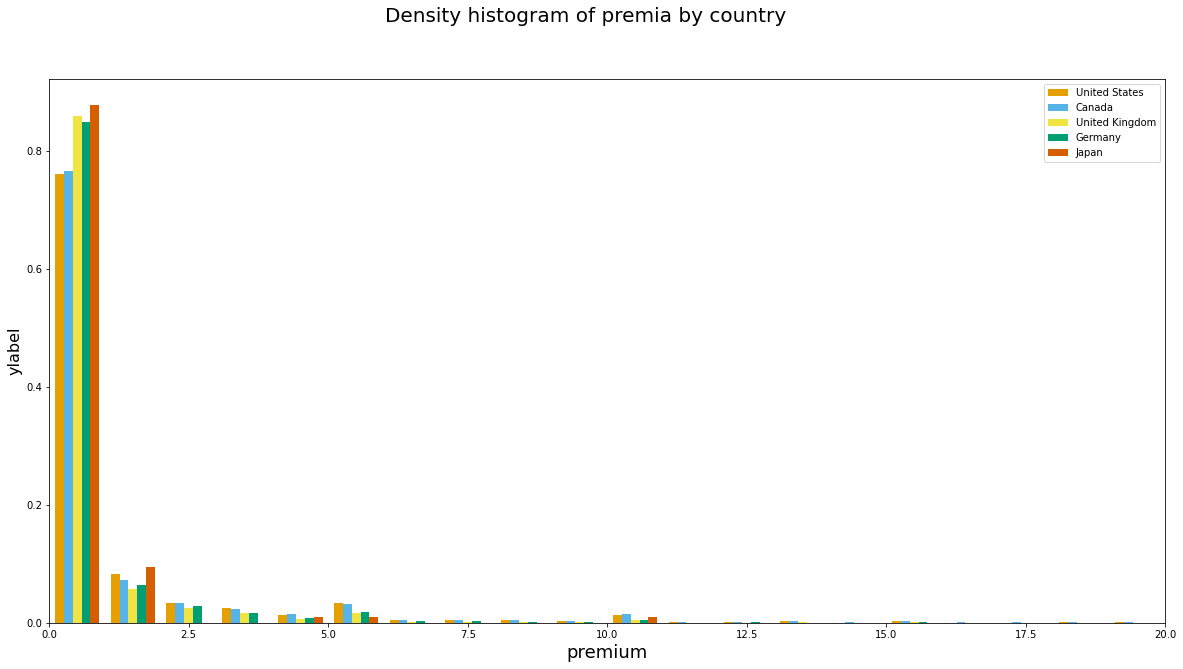

In [22]:
#https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
fig = plt.figure(figsize=(20,10))
plt.xlim([0, 20])

# Make a separate list for each country
x1 = list(df[df["country"] == "United States"]['premium'])
x2 = list(df[df["country"] == "Canada"]['premium'])
x3 = list(df[df["country"] == "United Kingdom"]['premium'])
x4 = list(df[df["country"] == "Germany"]['premium'])
x5 = list(df[df["country"] == "Thailand"]['premium'])

# Assign colors for each country and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United States','Canada','United Kingdom', 'Germany', 'Japan']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
ax = plt.hist([x1, x2, x3, x4, x5], bins = 200, density=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
fig.suptitle('Density histogram of premia by country ', fontsize=20)
plt.xlabel('premium', fontsize=18)
plt.ylabel('density', fontsize=16)

In [64]:
artist_count = pd.DataFrame(df['artist_name'].value_counts())
artist_count
artist_count = artist_count.reset_index()

In [65]:
artist_count

,index,artist_name
0,Various Artists,4247
1,Grace Petrie,2221
2,Toby Fox,880
3,Bonobo,858
4,Phoebe Bridgers,847
...,...,...
62245,Redhead Match,1
62246,Aura Safari,1
62247,yourboykiran,1
62248,Tala AM,1


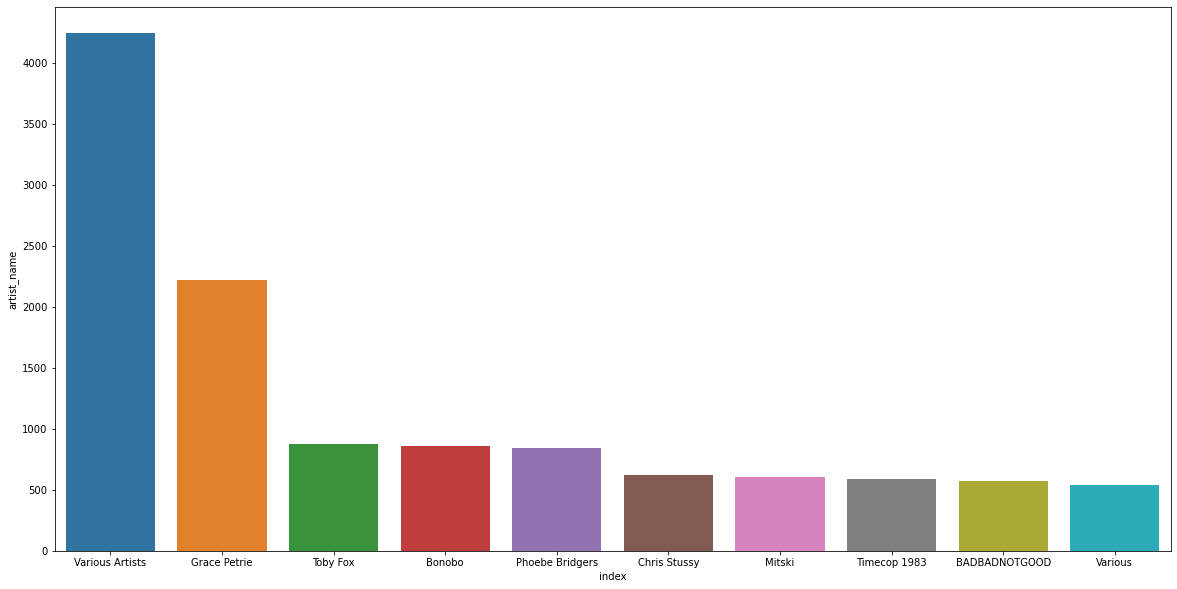

In [69]:
sns.barplot(x = artist_count['index'][:10] , y=artist_count['artist_name'][:10])

In [58]:
df['item_description'].value_counts()[:30]

Limited Edition Cassette                                           1424
Connectivity                                                       1342
CD                                                                 1166
Limited Edition 12" Vinyl                                           969
Compact Disc                                                        935
12" Vinyl                                                           841
Limited Edition Compact Disc                                        811
That Funny Feeling                                                  742
Connectivity CD                                                     669
DELTARUNE Chapter 2 OST                                             613
Cassette                                                            509
Working for the Knife                                               481
LP                                                                  455
Hikikomori Lake                                                 

In [23]:
plt.figure(figsize=(20,10))
plt.xlim([0, 30])

# Make a separate list for each item price bracket
x1 = list(df_US[df_US["item_price"] == 0]['premium'])
x2 = list(df_US[(df_US["item_price"] > 0) & (df["item_price"] <= 8.00)]['premium'])
x3 = list(df_US[(df_US["item_price"] > 8) & (df["item_price"] <= 16.00)]['premium'])
x4 = list(df_US[(df_US["item_price"] > 16) & (df["item_price"] <= 24.00)]['premium'])
x5 = list(df_US[(df_US["item_price"] > 24) & (df["item_price"] <= 30.00)]['premium'])
x6 = list(df_US[df_US["item_price"] > 30]['premium'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00', '#009E73']
names = ['free','0-5','5-10', '10-15', '15-20', '20+']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5,x6], bins = 200, density=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
fig.suptitle('Density histogram of premia by listing price', fontsize=20)
plt.xlabel('premium', fontsize=18)
plt.ylabel('density', fontsize=16)

pandas.core.frame.DataFrame

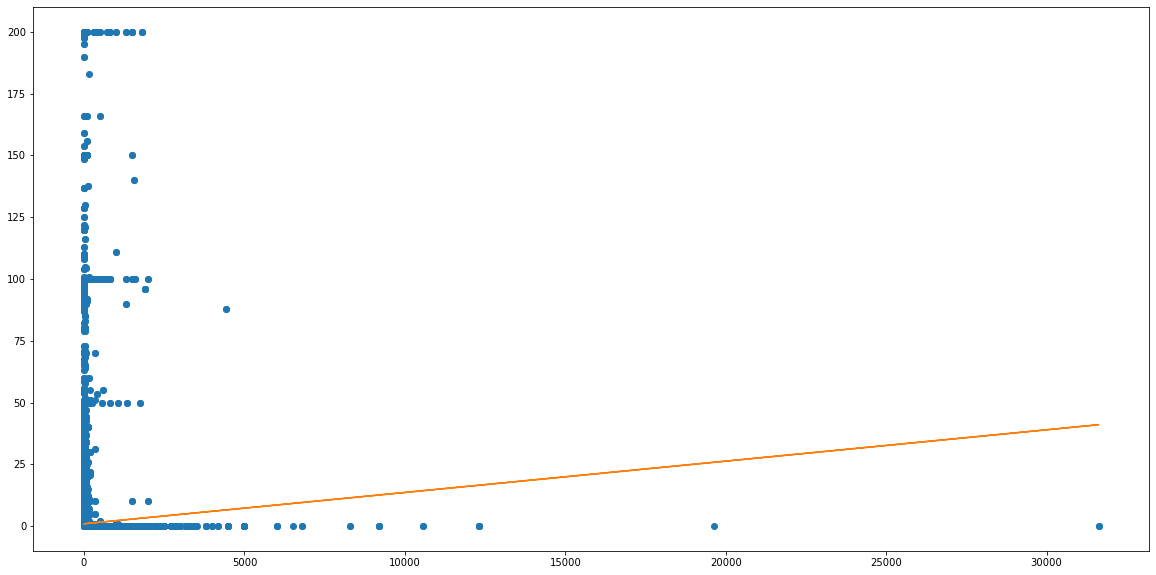

In [25]:
plt.plot(df["item_price"], df["premium"], 'o')

m, b = np.polyfit(df["item_price"], df["premium"], 1)
plt.plot(df["item_price"], m*df["item_price"] + b)

In [28]:
df = df[df['item_price'] <= 500.00].copy()

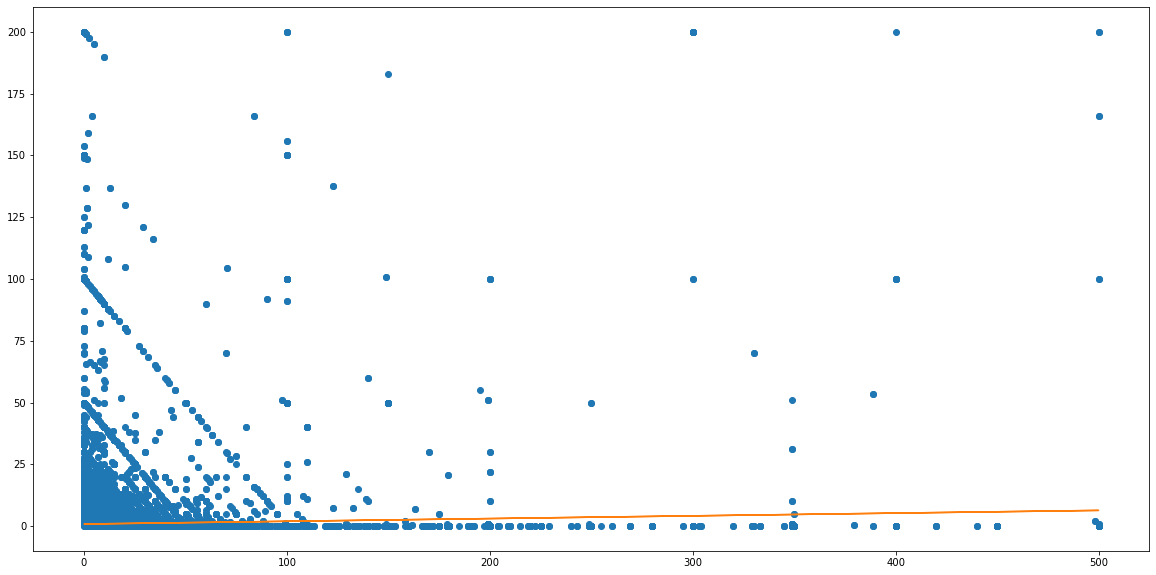

In [29]:
plt.plot(df["item_price"], df["premium"], 'o')

m, b = np.polyfit(df["item_price"], df["premium"], 1)
plt.plot(df["item_price"], m*df["item_price"] + b)

/Users/school/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/school/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

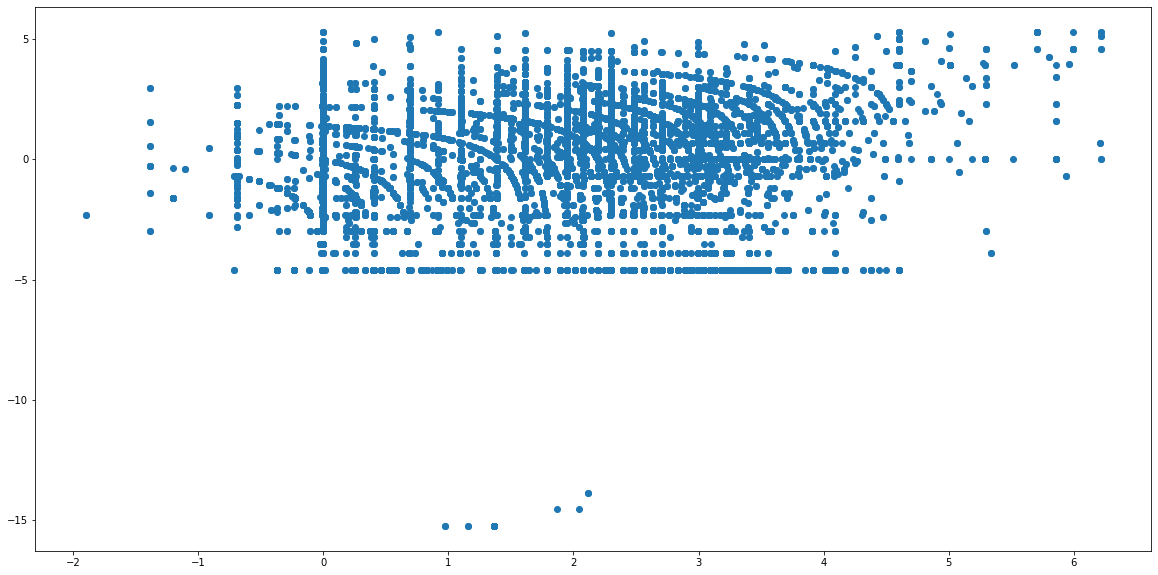

In [31]:
x= np.log(df["item_price"])
y=np.log(df["premium"])

x.dropna(inplace=True)
y.dropna(inplace=True)
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

(0.0, 30.0)

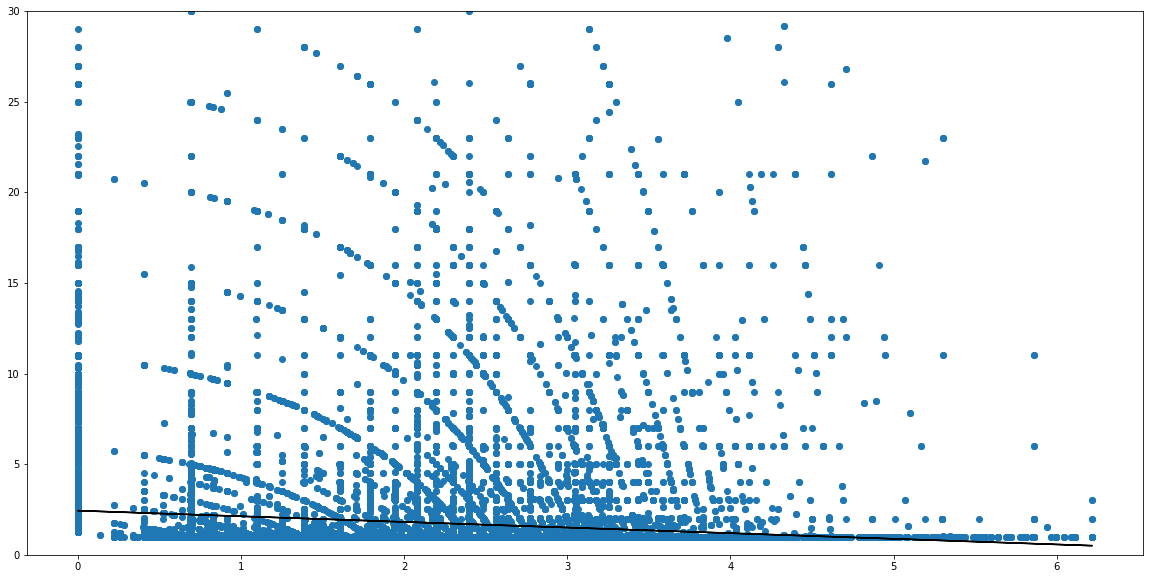

In [52]:
from sklearn.linear_model import LinearRegression
# I added 0.001 before taking the log as to avoid taking log(0) which gives inf
# also note that in sklearn, the x has to be a [[]] array, thus the reshape
x = np.array(list(np.log(df["item_price"]+1))).reshape((-1, 1))
y = np.array(list((df["premium"]+1)))

reg = LinearRegression().fit(x, y)
plt.scatter(x,y)
plt.plot(x, reg.predict(x),color='k')
plt.ylim([0, 30])
#plt.plot(x, y, 'o')

#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x + b)

In [72]:
from statsmodels.regression import linear_model
import statsmodels.api as sm
x = sm.add_constant(np.array(list(np.log(df["item_price"]+1))).reshape((-1, 1)))
y = np.array(list((df["premium"]+1)))
model = linear_model.OLS(y, x).fit()

# why you need intercept:
# https://stats.stackexchange.com/questions/26176/removal-of-statistically-significant-intercept-term-increases-r2-in-linear-mo


In [74]:
#https://towardsdatascience.com/interaction-effect-in-multiple-regression-3091a5d0fadd
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1223.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.20e-267
Time:                        21:36:36   Log-Likelihood:            -1.0048e+06
No. Observations:              326465   AIC:                         2.010e+06
Df Residuals:                  326463   BIC:                         2.010e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4371      0.017    142.037      0.000       2.403       2.471
x1            -0.3110      0.009    -34.968      0.000      -0.328      -0.294
==============================================================================
Omnibus:                   713860.977   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4288435193.111
Skew:                          20.061   Prob(JB):                         0.00
Kurtosis:                     563.048   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
https://www.youtube.com/watch?v=b6HMdUe9gy4
Quantile regression:

- a OLS regerssion breaks down if one of the 4 underlying assumptions is not satisfied.
- ie. non constant variance in residual , which is the case in the above plot.
- when this happens and you fit an OLS, the inference aspect can't be rigourous or it isnt properly done
- further more, OLS regression 
    predicts the mean value of the outcome given input x
    however the mean is often not a good central tendancy for skewed distributions 
    validity of inference depends on the distribution of errors
    and note that results are significantly affected by outliers
    
Medium regression:
- predicts and draw inference aboout the median, which may be a better central tendancy than mean
- no assuption is made about the distribution of the residuals 
- it is also less affected by outliers
- can work with quadratic term, interaction term


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
df_quant = pd.DataFrame()
df_quant['x'] = list((np.array(list(np.log(df["item_price"]+1)))))
df_quant['y'] = list(np.array(np.log(list((df["premium"]+1)))))

In [ ]:
df_quant['x']

In [ ]:
model = smf.quantreg('y ~ x', df_quant).fit(q=0.50)

In [ ]:
print(model.summary())

In [ ]:
We see that the coeff of x is -2.77e-07 for median

In [ ]:
quantiles = np.arange(0.05, 0.96, 0.1)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["income"]] + res.conf_int().loc[
        "income"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "a", "b", "lb", "ub"])

ols = smf.ols("foodexp ~ income", data).fit()
ols_ci = ols.conf_int().loc["income"].tolist()
ols = dict(
    a=ols.params["Intercept"], b=ols.params["income"], lb=ols_ci[0], ub=ols_ci[1]
)

print(models)
print(ols)

In [ ]:
Earth mover's distance

In [ ]:
from scipy.stats import wasserstein_distance

In [ ]:
wasserstein_distance(x1,x2)